<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right"></IMG>
</figure>

# 6. Pandas

## 6.1 Introduction 

With the standard Python functions and the <b><code>numpy</code></b> library, you already have access to powerful tools to process data. However, you'll find that organizing data using them might still be confusing and messy... so let us introduce you to <b><code>pandas</code></b>: a Python library specialized in data organization. Its functions are simple to use, and they achieve a lot. Furthermore, <b><code>pandas</code></b> was built on top of the <b><code>numpy</code></b> library, using some of their functions and data structures. This makes <b><code>pandas</code></b> fast. The <b><code>pandas</code></b> library is often used in Data Science and Machine Learning to organize data that are used as input in other functions, of other libraries. For example, you store and organize an Excel file using <b><code>pandas</code></b> data structures, apply statistical analysis using <b><code>SciPy</code></b>, and then plot the result using <b><code>matplotlib</code></b>.<br><br> In this section, we'll introduce you to the basic <b><code>pandas</code></b> data structures: the <b><code>Series</code></b> and <b><code>DataFrame</code></b> objects; and how to store data in them. In <b><code>pandas</code></b>, a <b><code>Series</code></b> represents a list, and <b><code>DataFrame</code></b> represents a table.

In [1]:
# as always, let's import some libraries
import pandas as pd 
import numpy as np # we'll use numpy only for comparison

## 6.2 ``Series``

We start with <b><code>pandas Series</code></b>, since a <b><code>DataFrame</code></b> is made out of <b><code>Series</code></b>; retrieving a row or a column from a <b><code>DataFrame</code></b> results in a <b><code>Series</code></b>. A <b><code>Series</code></b> object is a <b><code>numpy</code></b> ndarray used to hold one-dimensional data, like a list.  We create a <b><code>Series</code></b> object using its constructor <b><code>pd.Series()</code></b>. It can be called by using a list that you want to convert into a <b><code>pandas series</code></b>. Unlike <b><code>numpy</code></b> arrays, a <b><code>Series</code></b> may hold data of different types.

In [2]:
# Create a list containing elements of various types:
my_list = ['begin', 2, 3/4, "end"]

# Construct a Series and a numpy.array using our list:
my_series = pd.Series(data=my_list)
my_nparray = np.array(my_list)

# Compare the type of each element in my_series and my_nparray
for i in range(len(my_list)):
    print('----type of each element----')
    print(f'my_series element #{i} => {type(my_series[i])}')
    print(f'my_nparray element #{i} => {type(my_nparray[i])}\n')

----type of each element----
my_series element #0 => <class 'str'>
my_nparray element #0 => <class 'numpy.str_'>

----type of each element----
my_series element #1 => <class 'int'>
my_nparray element #1 => <class 'numpy.str_'>

----type of each element----
my_series element #2 => <class 'float'>
my_nparray element #2 => <class 'numpy.str_'>

----type of each element----
my_series element #3 => <class 'str'>
my_nparray element #3 => <class 'numpy.str_'>



As expected, the <b><code>numpy</code></b> array changed all elements to one type; in this case, strings. As mentioned in Section 5.1, in Notebook 5, a <b><code>numpy</code></b> array cannot hold data of different types.

In [3]:
# Note that a pandas series is, by default, printed more elaborately 
# showing each element's index
print(my_series)
print('-----------------')
print(my_nparray)

0    begin
1        2
2     0.75
3      end
dtype: object
-----------------
['begin' '2' '0.75' 'end']


The values of a series can be accessed and sliced using the **``iloc()``** function: 

In [4]:
my_series.iloc[1:]

1       2
2    0.75
3     end
dtype: object

In [5]:
my_series.iloc[[2,len(my_series)-1]]

2    0.75
3     end
dtype: object

### Labeling ``Series``

So far we have referred to values within a list or array using indexing, but that might be confusing. With <b><code>pandas Series</code></b>, you can refer to your values by labeling their indices. Labels allow you to access the values in a more informative way, similar to dictionaries; depicted in Section 2.3, in Notebook 2.

In [6]:
# Create the indices of the same size as the list 
# we want to construct our Series object with.

my_index_labels = ["My first entry", "1","2","END"]

# Use the index option in the Series constructor
my_labeled_Series = pd.Series(data=my_list, index=my_index_labels)

# Note that our entries can be called both ways
print(my_labeled_Series[0] == my_labeled_Series["My first entry"])

True


<code>pandas</code></b> can automatically create labels of indices if we construct a <b><code>Series</code></b> using a dictionary with labeled entries.

In [7]:
my_dictionary = {"a list": [420, 10],"a float": 380/3, "a list of strings": ["first word", "Second Word", "3rd w0rd"] }
my_Series = pd.Series(my_dictionary)
print(my_Series)

a list                                         [420, 10]
a float                                       126.666667
a list of strings    [first word, Second Word, 3rd w0rd]
dtype: object


In [8]:
# We can access an element within the list labeled "a list of strings" 
# by using its label followed by the desired index

my_Series["a list of strings"][1]

'Second Word'

::: {warning}
When using <code>pandas</code>, it's a good idea to try and avoid <code>for</code> loops or iterative solutions; <code>pandas</code> usually has a faster solution than iterating through its elements.
::: 

## 6.3 ``DataFrame``
A <b><code>DataFrame</code></b> is a data structure used to represent two-dimensional data. A common example of data organized in two dimensions are tables or two-dimensional arrays.

Usually, <b><code>DataFrames</code></b> are made out of <b><code>Series</code></b>. However, its constructor accepts other types.

In [12]:
# define a few series to represent individual rows:

row_1 = pd.Series(['Garnet', 7.0,   'Fracture', 3.9  ])
row_2 = pd.Series(['Graphite', 1.5, 'One', 2.3 ])
row_3 = pd.Series(['Kyanite', 6,    'One', 4.01   ])
row_4 = pd.Series(['test', 'bad', '@#$%^', False, "asdf"])
# data from: https://www.researchgate.net/figure/Selected-physical-properties-of-minerals-common-to-NYC-bedrock_tbl1_228544586

By default, the <b><code>DataFrame</code></b> constructor creates rows with the elements of each <b><code>Series</code></b>

In [13]:
# create DataFrame using multiple Series as rows

df2 = pd.DataFrame(data=[row_1, row_2, row_3, row_4]) 
# the name "df" is often used as a name for a dataframe object

df2

,0,1,2,3,4
0,Garnet,7.0,Fracture,3.9,NaN
1,Graphite,1.5,One,2.3,NaN
2,Kyanite,6,One,4.01,NaN
3,test,bad,@#$%^,False,asdf


We can also create a <b><code>DataFrame</code></b> using <b><code>Series</code></b> as columns:

In [14]:
# define series representing columns:
name = pd.Series(['Amphibole', 'Biotite', 'Calcite', 'Dolomite', 'Feldspars'])
hardness = pd.Series([5.5, 2.75, 3, 3, 6])
specific_gravity = pd.Series([2.8, 3.0, 2.72, 2.85, 2.645])
test = pd.Series(['A', 12j, True, 9, 11.00000])

# convert each series to a dataframe:
col_1 = name.to_frame(name='name') 
col_2 = hardness.to_frame(name='hardness')
col_3 = specific_gravity.to_frame(name='sp. gr.')
col_4 = test.to_frame(name='test')


After creating each column, we can concatenate them together into one <b><code>DataFrame</code></b> table using the <b><code>pd.concat()</code></b> function. There are two axes in a <b><code>DataFrame</code></b>: '0' (or 'index') for the rows, and '1' (or 'columns') for the columns. We want to concatenate the series along their columns, so use <b><code>axis=1</code></b> (or <b><code>axis='columns'</code></b>).

In [15]:
#concatenate the series into one dataframe:
df1 = pd.concat([col_1, col_2, col_3, col_4], axis=1)
df1

,name,hardness,sp. gr.,test
0,Amphibole,5.50,2.800,A
1,Biotite,2.75,3.000,12j
2,Calcite,3.00,2.720,True
3,Dolomite,3.00,2.850,9
4,Feldspars,6.00,2.645,11.0


Alternatively, you could use the <b><code>np.transpose()</code></b> function to generate the <b><code>DataFrame</code></b> using a <b><code>Series</code></b> as columns:

In [16]:
# transpose
df_T = pd.DataFrame(data=[name,hardness,specific_gravity,test]).T

# then label the columns
df_T.columns=['name', 'hardness', 'sp. gr.', 'test']

df_T

,name,hardness,sp. gr.,test
0,Amphibole,5.5,2.8,A
1,Biotite,2.75,3.0,12j
2,Calcite,3.0,2.72,True
3,Dolomite,3.0,2.85,9
4,Feldspars,6.0,2.645,11.0


To create a new column, simply do:

In [17]:
df1['new_column'] = np.nan
df1

,name,hardness,sp. gr.,test,new_column
0,Amphibole,5.50,2.800,A,NaN
1,Biotite,2.75,3.000,12j,NaN
2,Calcite,3.00,2.720,True,NaN
3,Dolomite,3.00,2.850,9,NaN
4,Feldspars,6.00,2.645,11.0,NaN


### Labeling ``DataFrames``

You can also rename your columns' and rows' index names by changing your DataFrame's <b><code>columns</code></b> and <b><code>index</code></b> attributes, respectively. Recall our <b><code>df2</code></b>:

In [18]:
df2

,0,1,2,3,4
0,Garnet,7.0,Fracture,3.9,NaN
1,Graphite,1.5,One,2.3,NaN
2,Kyanite,6,One,4.01,NaN
3,test,bad,@#$%^,False,asdf


Now let's rename its columns' and rows' index names.

In [19]:
# renaming columns' index names
df2.columns = ['name', 'hardness',  'cleavage', 'sp. gr.','test']

# renaming rows' index names
df2.index = ['row0','row1','row2','row3']

df2 # calling df2 again

,name,hardness,cleavage,sp. gr.,test
row0,Garnet,7.0,Fracture,3.9,NaN
row1,Graphite,1.5,One,2.3,NaN
row2,Kyanite,6,One,4.01,NaN
row3,test,bad,@#$%^,False,asdf


### Concatenating ``DataFrames``

We can also concatenate <b><code>DataFrames</code></b> to each other, even if they are of different sizes.

In [20]:
df3 = pd.concat([df1, df2])
print(df3)

           name hardness sp. gr.  test  new_column  cleavage
0     Amphibole      5.5     2.8     A         NaN       NaN
1       Biotite     2.75     3.0   12j         NaN       NaN
2       Calcite      3.0    2.72  True         NaN       NaN
3      Dolomite      3.0    2.85     9         NaN       NaN
4     Feldspars      6.0   2.645  11.0         NaN       NaN
row0     Garnet      7.0     3.9   NaN         NaN  Fracture
row1   Graphite      1.5     2.3   NaN         NaN       One
row2    Kyanite        6    4.01   NaN         NaN       One
row3       test      bad   False  asdf         NaN     @#$%^


In the resulting table, we notice that <b><code>pandas</code></b> automatically added <b><code>NaN</code></b> <i>("Not a Number")</i> values to the missing entries of either table. Very convenient!

### Removing rows and columns

Our table looks a bit messy though... let's make it better by removing the <i>'test'</i> row and column. We can drop them by using the <b><code>pd.drop()</code></b> function.  By default, the <b><code>pd.drop()</code></b> function outputs a copy of the inserted <b><code>DataFrame</code></b> without the dropped items. The original data will then be preserved if you give a new name to the dataframe (i.e., the copy) with dropped items.

In [21]:
# example of how you could use pd.drop() to remove a row or column
new_df3 = df3.drop('row3', axis=0) # note that we used that row's index name
new_df3 = new_df3.drop('test', axis=1) # and column's index name
print(new_df3)

           name hardness sp. gr.  new_column  cleavage
0     Amphibole      5.5     2.8         NaN       NaN
1       Biotite     2.75     3.0         NaN       NaN
2       Calcite      3.0    2.72         NaN       NaN
3      Dolomite      3.0    2.85         NaN       NaN
4     Feldspars      6.0   2.645         NaN       NaN
row0     Garnet      7.0     3.9         NaN  Fracture
row1   Graphite      1.5     2.3         NaN       One
row2    Kyanite        6    4.01         NaN       One


In [22]:
# recall that df3 is unchanged
df3

,name,hardness,sp. gr.,test,new_column,cleavage
0,Amphibole,5.5,2.8,A,NaN,NaN
1,Biotite,2.75,3.0,12j,NaN,NaN
2,Calcite,3.0,2.72,True,NaN,NaN
3,Dolomite,3.0,2.85,9,NaN,NaN
4,Feldspars,6.0,2.645,11.0,NaN,NaN
row0,Garnet,7.0,3.9,NaN,NaN,Fracture
row1,Graphite,1.5,2.3,NaN,NaN,One
row2,Kyanite,6,4.01,NaN,NaN,One
row3,test,bad,False,asdf,NaN,@#$%^


In case you would like to edit the original <b><code>df3</code></b>; you would apply the drop-operation <i>'inplace'</i>. For this, we use the <b><code>inplace=True</code></b> option. To avoid dropping rows and columns with the same index name, you could use the <b><code>pd.reset_index()</code></b> function. With <b><code>drop=True</code></b>, the new <b><code>DataFrame</code></b> will have dropped the old indexes; keeping the new reset ones.

In [23]:
# reset the index to the default integer index
# dropping the old indexes

df3_cleaned = df3.reset_index(drop=True) 
df3_cleaned

,name,hardness,sp. gr.,test,new_column,cleavage
0,Amphibole,5.5,2.8,A,NaN,NaN
1,Biotite,2.75,3.0,12j,NaN,NaN
2,Calcite,3.0,2.72,True,NaN,NaN
3,Dolomite,3.0,2.85,9,NaN,NaN
4,Feldspars,6.0,2.645,11.0,NaN,NaN
5,Garnet,7.0,3.9,NaN,NaN,Fracture
6,Graphite,1.5,2.3,NaN,NaN,One
7,Kyanite,6,4.01,NaN,NaN,One
8,test,bad,False,asdf,NaN,@#$%^


In [24]:
# now let's drop row 8
df3_cleaned.drop(8,inplace=True)

# and column 'test' (remember to add axis=1 when dropping a column)
df3_cleaned.drop('test',inplace=True, axis=1)
print(df3_cleaned)


        name hardness sp. gr.  new_column  cleavage
0  Amphibole      5.5     2.8         NaN       NaN
1    Biotite     2.75     3.0         NaN       NaN
2    Calcite      3.0    2.72         NaN       NaN
3   Dolomite      3.0    2.85         NaN       NaN
4  Feldspars      6.0   2.645         NaN       NaN
5     Garnet      7.0     3.9         NaN  Fracture
6   Graphite      1.5     2.3         NaN       One
7    Kyanite        6    4.01         NaN       One


Note that if you try to re-run the above cell without re-running the previous one, you will get an error. This happens because after running the above cell once, you drop row '8' and the 'test' column from <b><code>df3_cleaned</code></b>, trying to run again will attempt to re-drop something that doesn't exist. Re-running the previous cell 'fixes' this issue since you re-assign <b><code>df3_cleaned</code></b> as <b><code>df3.reset_index(drop=True)</code></b>.

::: {warning}
If one or more rows (or columns) have the same index name, <code>pd.drop()</code> will drop all of them.
::: 

### Accessing and modifying <code>DataFrame</code> values

Now that we created our table, we want to be able to access and modify the individual values within it. This way we could add the missing values to the <i>'cleavage'</i> column. There are many ways to do this because <b><code>numpy</code></b> and standard Python functions are often still applicable on <b><code>pandas</code></b> data structures. However, there is a difference in processing speed. Therefore, when accessing or modifying data, try to use <b><code>pandas</code></b> functions, such as: <b><code>.iat()</code></b>, <b><code>.at()</code></b>, <b><code>.iloc()</code></b>, and <b><code>.loc()</code></b> instead of using the common <b><code>[]</code></b> square bracket syntax, as they might raise some warnings:

In [25]:
df3_cleaned.cleavage[1]='One' # warning

df3_cleaned # note that the value still changed, but avoid doing so

C:\Users\mmendozalugo\AppData\Local\Temp\ipykernel_21412\1163584331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_cleaned.cleavage[1]='One' # warning


,name,hardness,sp. gr.,new_column,cleavage
0,Amphibole,5.5,2.8,NaN,NaN
1,Biotite,2.75,3.0,NaN,One
2,Calcite,3.0,2.72,NaN,NaN
3,Dolomite,3.0,2.85,NaN,NaN
4,Feldspars,6.0,2.645,NaN,NaN
5,Garnet,7.0,3.9,NaN,Fracture
6,Graphite,1.5,2.3,NaN,One
7,Kyanite,6,4.01,NaN,One


### <code>.iat()</code> vs <code>.at()</code> vs <code>.iloc()</code> vs <code>.loc()</code>

In <a href = "https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-at-vs-iat">this discussion in stackoverflow</a>, they point out some differences between these methods. To keep in mind, <b><code>.iat()</code></b> and <b><code>.at()</code></b> are the fastest ones, but they only return scalars (one element), while <b><code>.loc()</code></b> and <b><code>.iloc()</code></b> can access several elements at the same time. Lastly, <b><code>.iat()</code></b> and <b><code>.iloc</code></b> use indexes (numbers), while <b><code>.at()</code></b> and <b><code>.loc()</code></b> use labels. For more information, check the stackoverflow discussion.

In [26]:
# accessing values using arrays as index with .iloc()
# only method that allows arrays in both rows and cols

indx_array_row = np.array([0,1,2])
indx_array_col = np.array([0,1,2,3])

df3_cleaned.iloc[indx_array_row[:2],indx_array_col[:3]]

,name,hardness,sp. gr.
0,Amphibole,5.5,2.8
1,Biotite,2.75,3.0


In [27]:
# accessing values with .loc(), only rows are allowed to be arrays
df3_cleaned.loc[indx_array_row[:2],'hardness']

0     5.5
1    2.75
Name: hardness, dtype: object

In [28]:
# or multiple columns with .loc():
df3_cleaned.loc[indx_array_row[:2],['hardness', 'cleavage']]

,hardness,cleavage
0,5.5,NaN
1,2.75,One


In [ ]:
# accessing values with .at(), no arrays allowed, only labels
df3_cleaned.at[0, 'hardness'] # row 0, 'hardness' column

# note that using 0 will work since we do not have labels for the rows
# so their labels are their index

In [29]:
# if we were to change the index of this df to their names
df3_cleaned.index = df3_cleaned.name

# and delete column 'name'

df3_cleaned.drop('name',axis=1,inplace=True)

In [30]:
df3_cleaned

,hardness,sp. gr.,new_column,cleavage
name,,,,
Amphibole,5.5,2.8,NaN,NaN
Biotite,2.75,3.0,NaN,One
Calcite,3.0,2.72,NaN,NaN
Dolomite,3.0,2.85,NaN,NaN
Feldspars,6.0,2.645,NaN,NaN
Garnet,7.0,3.9,NaN,Fracture
Graphite,1.5,2.3,NaN,One
Kyanite,6,4.01,NaN,One


In [31]:
# now using df.at[0,'hardness'] doesn't work since there's no row
# with label 0

df3_cleaned.at[0, 'hardness']

KeyError: 0

In [32]:
# accessing values with .iat(), no arrays allowed, no labels allowed
# only indexes
df3_cleaned.iat[1, 2]

nan

In [33]:
# in case you want to know the index number of a column or row:

print(df3_cleaned.columns.get_loc('new_column')) # new_column index
print(df3_cleaned.index.get_loc('Dolomite')) # Dolomite index

2
3


In [34]:
# since the above lines return the index of a column and row
# you can use them directly with .iat()

df3_cleaned.iat[df3_cleaned.index.get_loc('Dolomite'), df3_cleaned.columns.get_loc('new_column')]

nan

Selecting multiple columns:

In [35]:
df3_cleaned[['hardness','new_column']]

,hardness,new_column
name,,
Amphibole,5.5,NaN
Biotite,2.75,NaN
Calcite,3.0,NaN
Dolomite,3.0,NaN
Feldspars,6.0,NaN
Garnet,7.0,NaN
Graphite,1.5,NaN
Kyanite,6,NaN


Finally, removing a column by making a copy and re-assigning the original variable as its copy. (Alternative to <b><code>inplace=True</code></b>)

In [36]:
df3_cleaned = df3_cleaned.drop('new_column', axis=1)
df3_cleaned

,hardness,sp. gr.,cleavage
name,,,
Amphibole,5.5,2.8,NaN
Biotite,2.75,3.0,One
Calcite,3.0,2.72,NaN
Dolomite,3.0,2.85,NaN
Feldspars,6.0,2.645,NaN
Garnet,7.0,3.9,Fracture
Graphite,1.5,2.3,One
Kyanite,6,4.01,One


## 6.4 Importing data into <code>DataFrames</code> and exploring its attributes

<b><code>pandas</code></b> provides many functions to import data into <b><code>dataframes</code></b>, such as <b><code>read_csv()</code></b> to read delimited text files, or <b><code>read_excel()</code></b> for Excel or OpenDocument spreadsheets. <b><code>read_csv()</code></b> provides options that allow you to filter the data, such as specifying the separator/delimiter, the lines that form the headers, which rows to skip, etc. Let's analyze the <b><code>mineral_properties.txt</code></b>. Below a screenshot of it:<br><br>
    
    
    
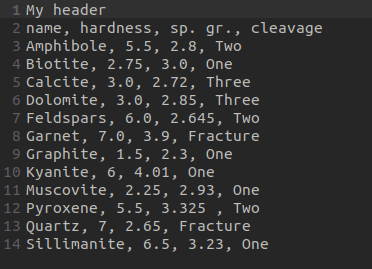</div>

In [37]:
# below we import the .txt

path = '../resource/lib/publicdata/'
df4 = pd.read_csv(path + 'mineral_properties.txt',sep=',',header=[1], 
                  skiprows=None, index_col=0)

# we indicate that the separator is the comma "sep=','"
# we indicate the header (what should be the columns names) is in the second line "header=[1]"
# we indicate to not skip any rows "skiprows=None"
# we indicate the first column should be the index of the rows "index_col=0"

df4

FileNotFoundError: [Errno 2] No such file or directory: '../resource/lib/publicdata/mineral_properties.txt'

In [ ]:
# note that if we try to call any of the columns from df4
# we will get an error

df4['hardness']

Do you know why?

<b>Answer</b> ...

In case you were not able to answer the above question, let's look into <b><code>df4.columns</code></b>

In [ ]:
df4.columns

You see there are spaces at the beginning of each column name... this happens because that's how people usually type, with commas followed by a space. We could use the <b><code>skipinitialspace = True</code></b> from the <b><code>pd.read_csv()</code></b> function to avoid this. Let's try it out:

In [ ]:
df4 = pd.read_csv(path + 'mineral_properties.txt',sep=',',header=[1], 
                  skiprows=None, index_col=0, skipinitialspace=True)
print(df4.columns)

Ok, much better!

## 6.5 Statistics with <b><code>pandas</code></b></h3><br><div style="text-align: justify">

Recall some functions such as <b><code>np.mean()</code></b> and <b><code>np.max()</code></b>; these functions can be used to calculate a row's or column's statistics. Say you want to know what's the average <i>hardness</i> of the different minerals:</div>

In [ ]:
df4['hardness'].mean()

<div style="text-align: justify">Often we don't know much about the data, and printing all the values is inconvenient. In that case, it's wise to take a look at some of its attributes first.</div>

In [ ]:
# see the labels of the columns and rows
print(df4.columns)
print('----------------------')
print(df4.index)

In [ ]:
# df4.info is similar to print(df4.info)
df4.info

### Deep copying a <code>DataFrame</code>

As you have seen in Notebook 4, shallow copies can be troublesome if you're not aware of it. In <b><code>pandas</code></b>, it's the same story.<br><br>To make a deep copy use the <b><code>DataFrame.copy(deep=True)</code></b> function.

In [ ]:
df_deep = df4.copy(deep=True)

Now, altering <b><code>df_deep</code></b> will not alter <b><code>df4</code></b>; and vice-versa.

## Additional study material:

* [Official pandas Documentation (Series)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series)
* [Official pandas Documentation (DataFrame)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)
* [Note on processing speed](https://ggbaker.ca/732/content/pandas-speed.html)
* [Real Python](https://realpython.com/pandas-python-explore-dataset/)


<h4>After this Notebook you should be able to:</h4>


- understand <b><code>Series</code></b> and <b><code>DataFrames</code></b>
- concatenate <b><code>DataFrames</code></b>
- work with different labels of a <b><code>DataFrame</code></b>
- drop unwanted rows and columns
- access and modify values within your <b><code>DataFrame</code></b>
- import data into a <b><code>pandas DataFrame</code></b>
- manipulate a <b><code>DataFrame</code></b> in several important ways